In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("dm_office_sales.csv")

In [4]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   division            1000 non-null   object
 1   level of education  1000 non-null   object
 2   training level      1000 non-null   int64 
 3   work experience     1000 non-null   int64 
 4   salary              1000 non-null   int64 
 5   sales               1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


## Scatterplot

<Axes: xlabel='salary', ylabel='sales'>

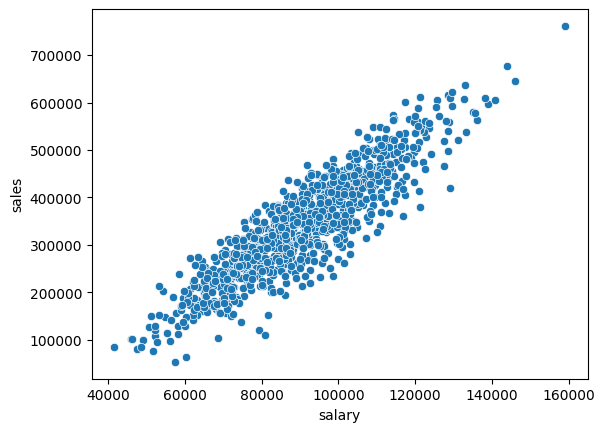

In [6]:
sns.scatterplot(x='salary', y='sales', data=df)

In [8]:
import matplotlib.pyplot as plt

<Axes: xlabel='salary', ylabel='sales'>

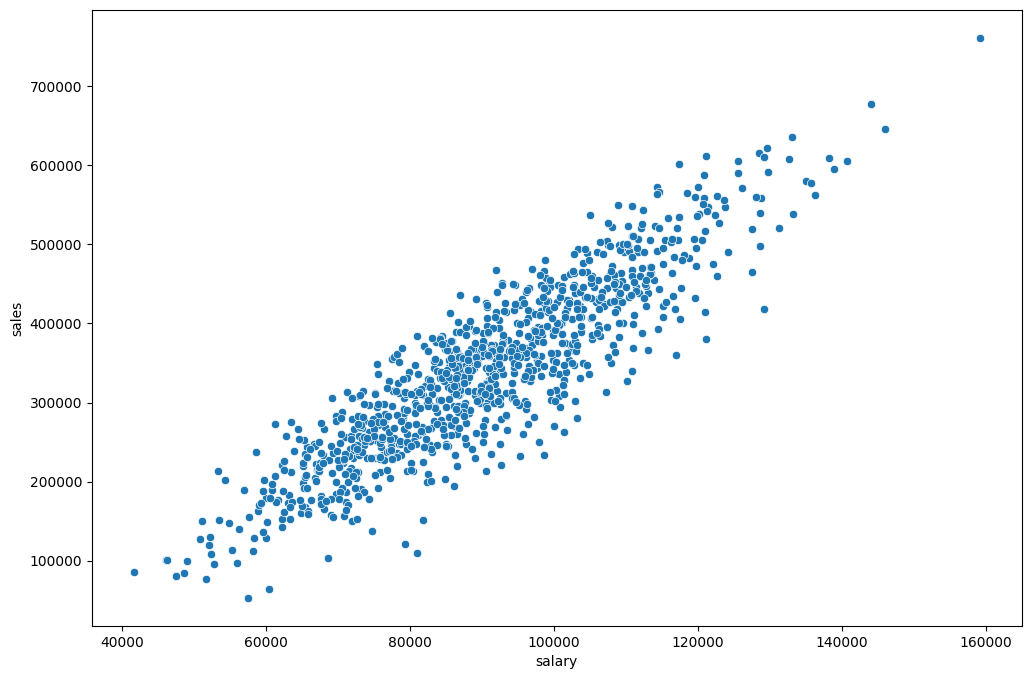

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary', y='sales', data=df)

## Seaborn Parameters
The hue and palette parameters are commonly available around many plot calls in seaborn.

### hue

Color points based off a categorical feature in the DataFrame

<Axes: xlabel='salary', ylabel='sales'>

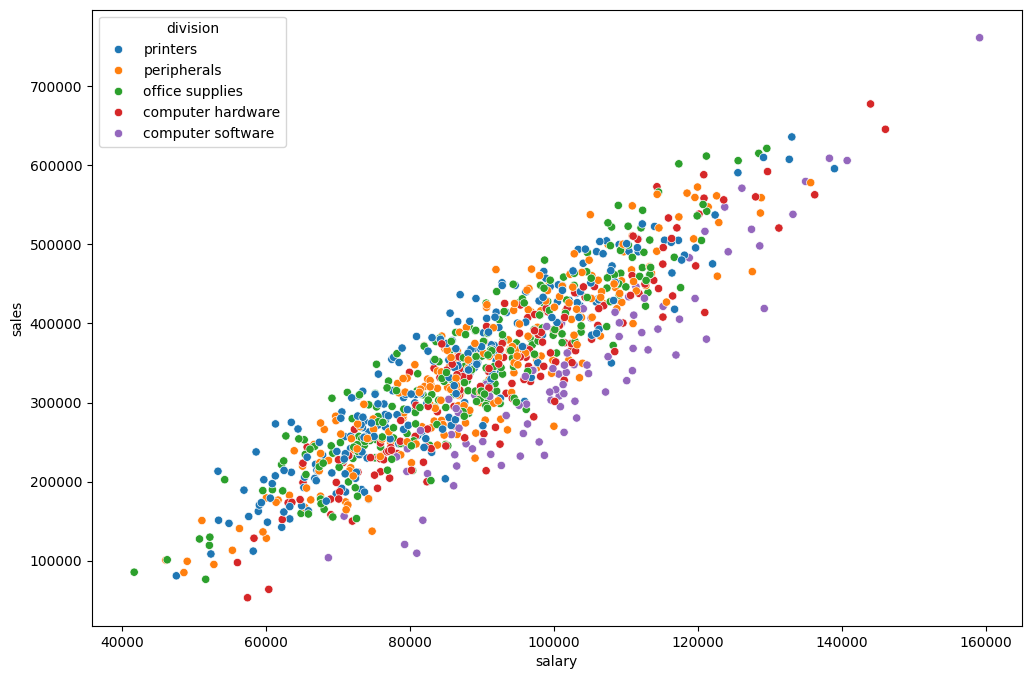

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary', y='sales', data=df, hue='division')

<Axes: xlabel='salary', ylabel='sales'>

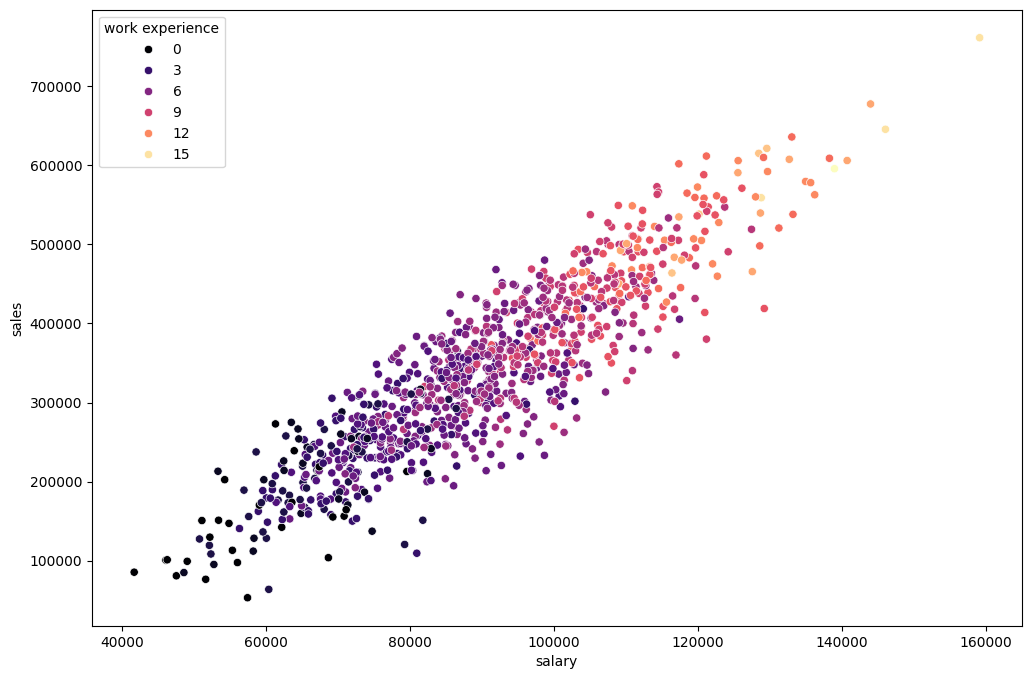

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary',y='sales',data=df,hue='work experience', palette='magma')

<Axes: xlabel='salary', ylabel='sales'>

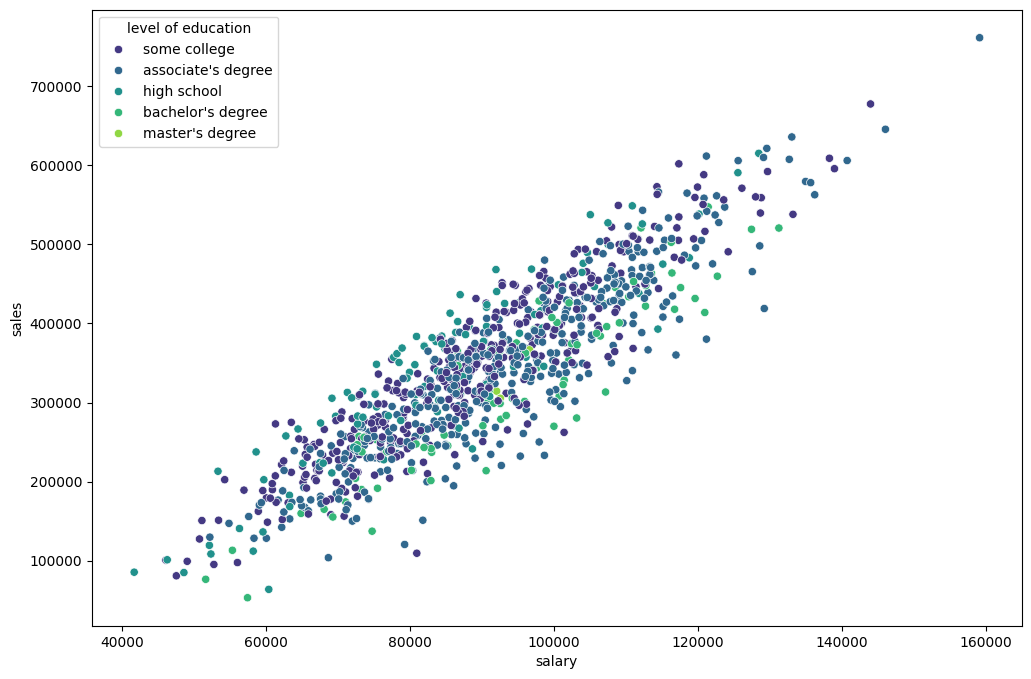

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary',y='sales',data=df,hue='level of education',palette='viridis')

## Scatterplot Parameters
These parameters are more specific to scatterplot() call

Size
Allows you to size based on another column

<Axes: xlabel='salary', ylabel='sales'>

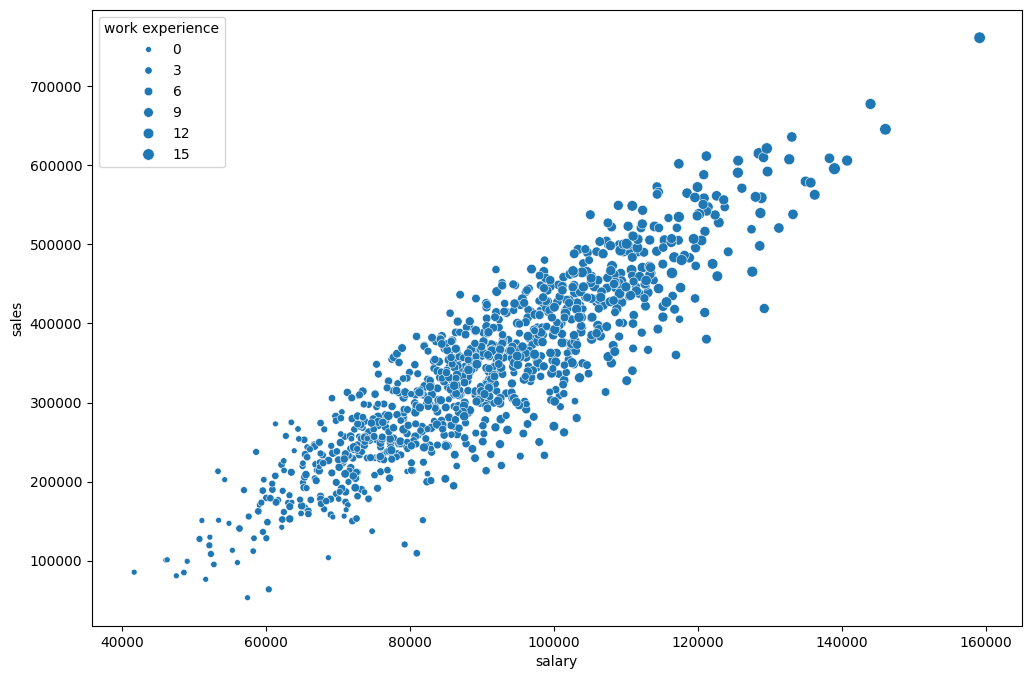

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary',y='sales',data=df,size='work experience')

<Axes: xlabel='salary', ylabel='sales'>

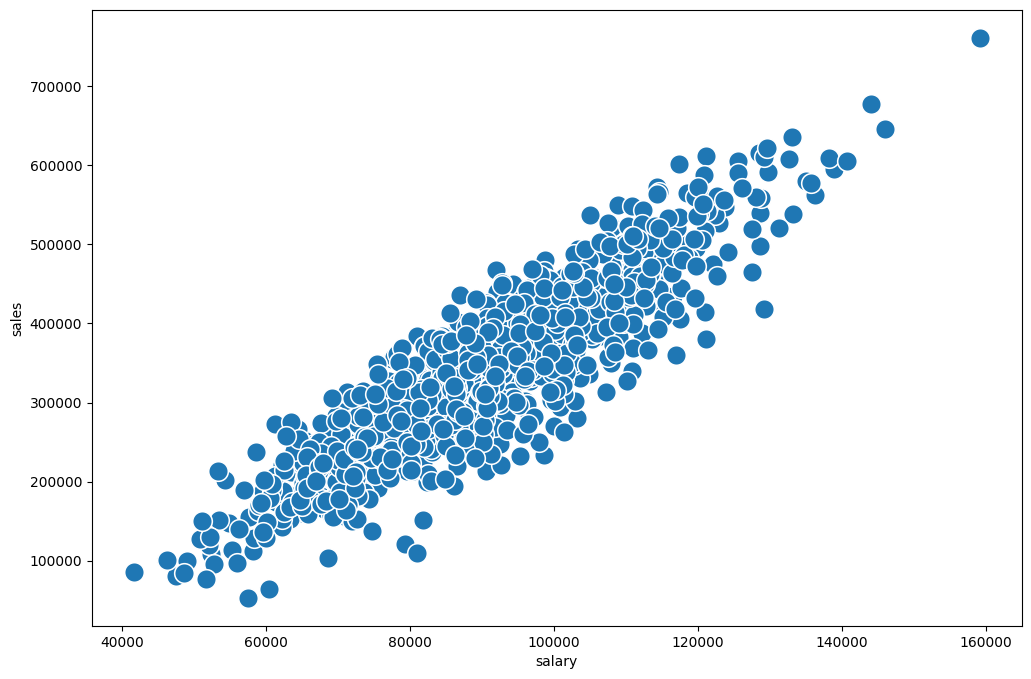

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary',y='sales',data=df,s=200)

<Axes: xlabel='salary', ylabel='sales'>

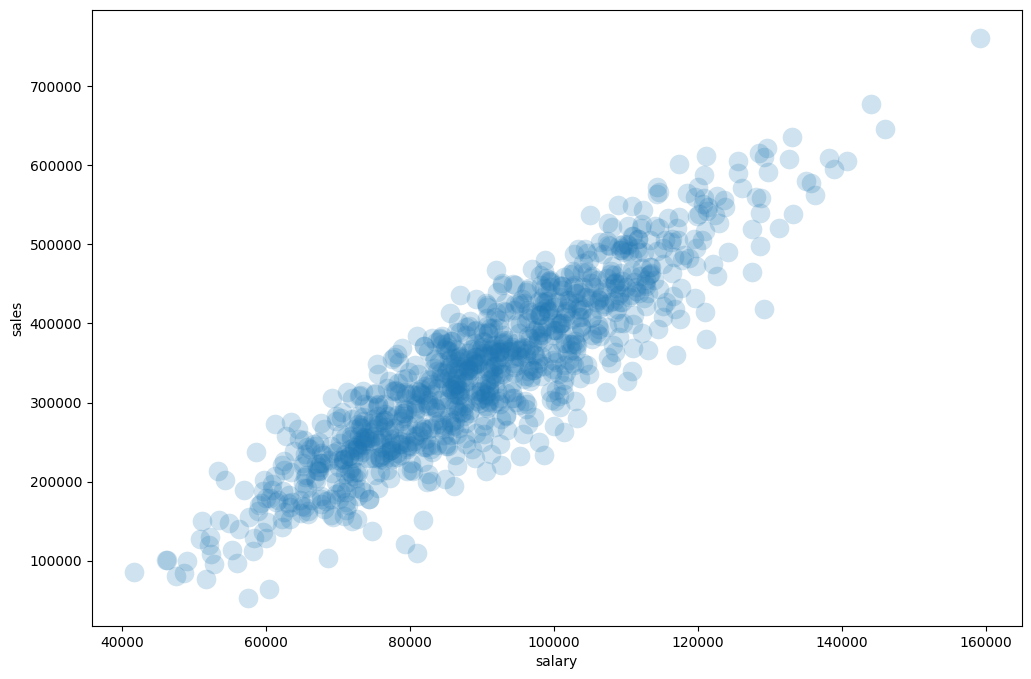

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary',y='sales',data=df,s=200,linewidth=0,alpha=0.21)

### style

Automatically choose styles based on another categorical feature in the dataset. Optionally use the **markers=** parameter to pass a list of marker choices based off matplotlib, for example: ['*','+','o']

<Axes: xlabel='salary', ylabel='sales'>

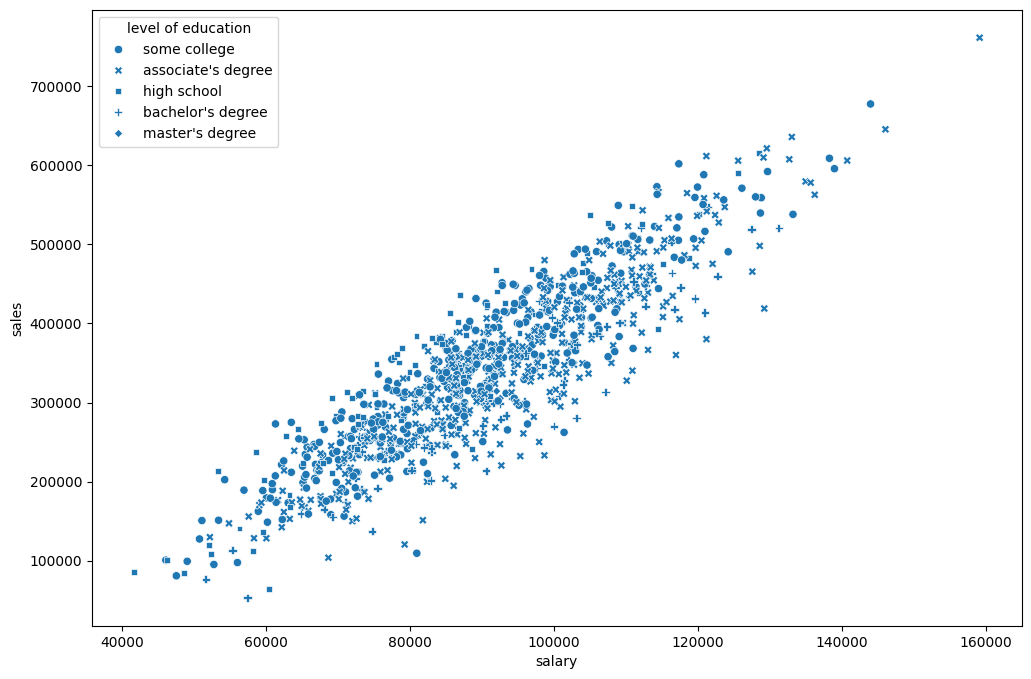

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary',y='sales',data=df,style='level of education')

<Axes: xlabel='salary', ylabel='sales'>

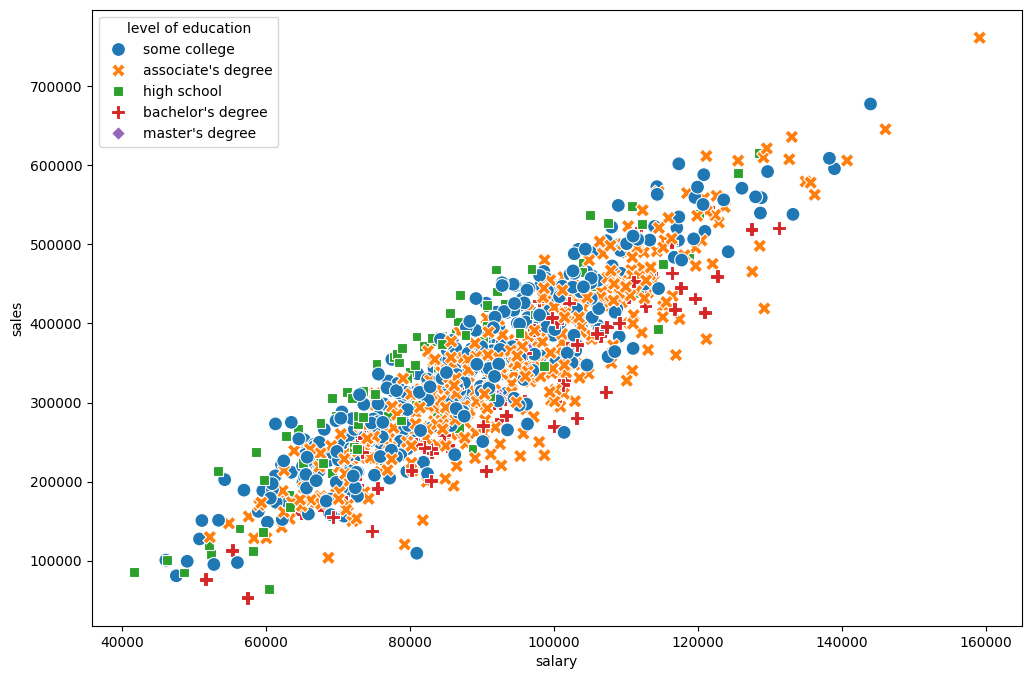

In [26]:
plt.figure(figsize=(12,8))
# Sometimes its nice to do BOTH hue and style off the same column
sns.scatterplot(x='salary',y='sales',data=df,style='level of education',hue='level of education',s=100)

## Exporting a Seaborn Figure

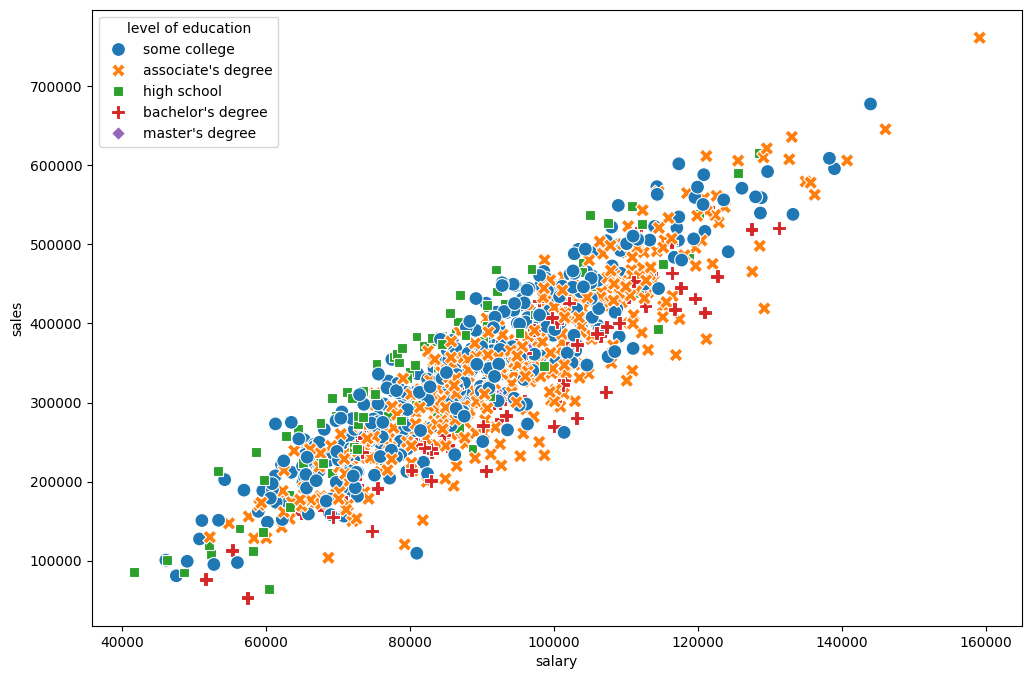

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary',y='sales',data=df,style='level of education',hue='level of education',s=100)

# Call savefig in the same cell
plt.savefig('scatter_plot1.jpg')

## Rugplot

Very simple plot that puts down one mark per data point. This plot needs the single array passed in directly. We won't use it too much since its not very clarifying for large data sets.

<Axes: xlabel='salary'>

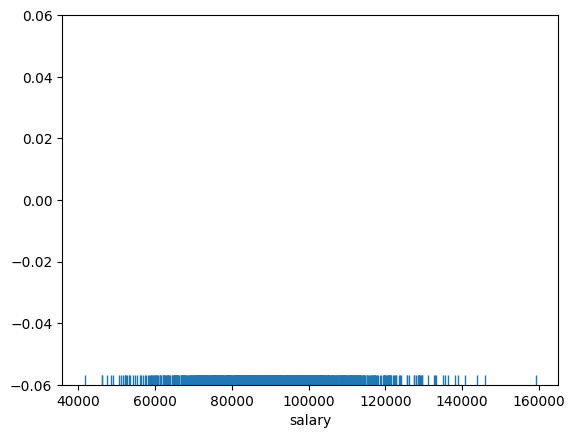

In [29]:
# The y axis doesn't really represent anything
# X axis is just a stick per data point
sns.rugplot(x='salary',data=df)

<Axes: xlabel='salary'>

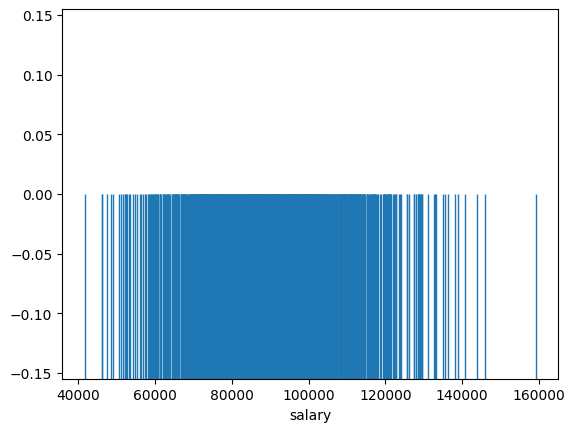

In [30]:
sns.rugplot(x='salary',data=df,height=0.5)

## displot() and histplot()  
The rugplot itself is not very informative for larger data sets distribution around the mean since so many ticks makes it hard to distinguish one tick from another. Instead we should count the number of tick marks per some segment of the x axis, then construct a histogram from this.

The displot is a plot type that can show you the distribution of a single feature. It is a histogram with the option of adding a "KDE" plot (Kernel Density Estimation) on top of the histogram. Let's explore its use cases and syntax.

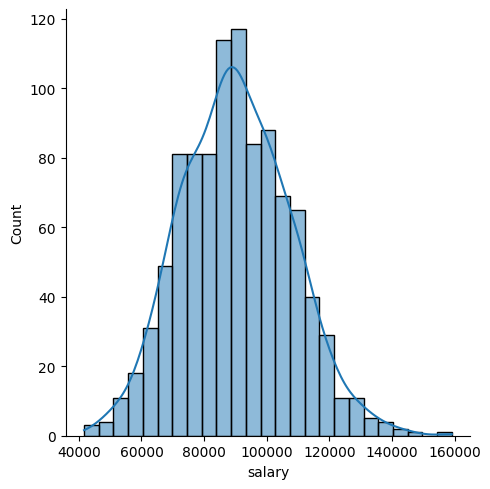

In [31]:
sns.displot(data=df, x='salary', kde=True)

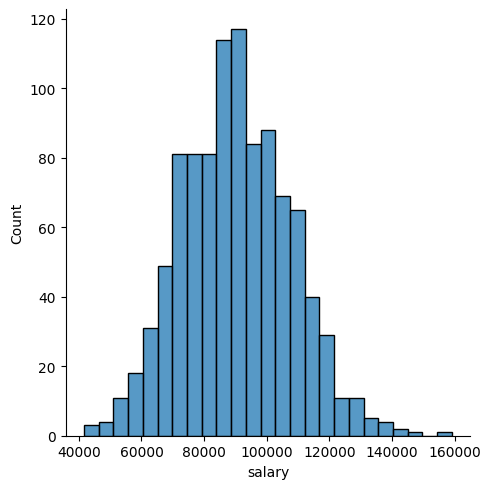

In [32]:
sns.displot(data=df,x='salary')

<Axes: xlabel='salary', ylabel='Count'>

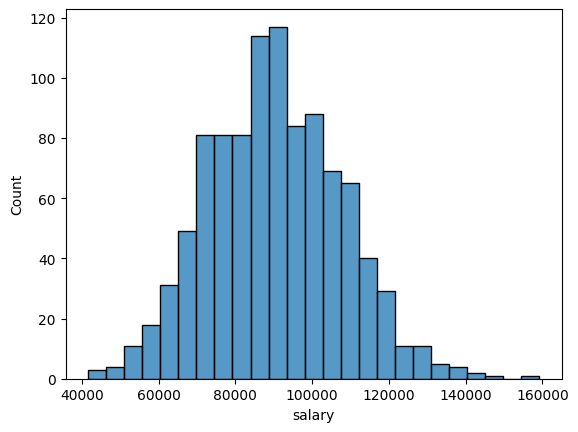

In [33]:
sns.histplot(data=df,x='salary')

<Axes: xlabel='salary', ylabel='Count'>

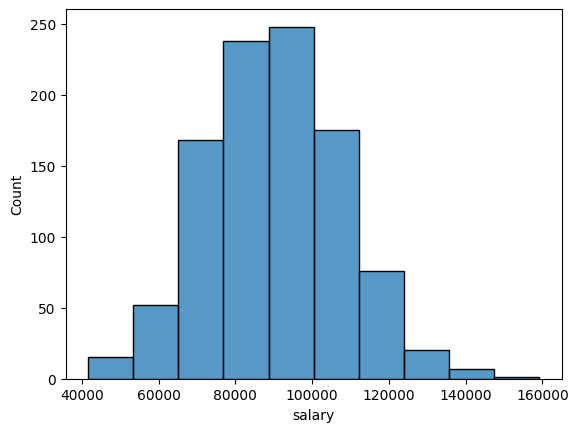

In [34]:
#Number of bins
sns.histplot(data=df,x='salary',bins=10)

<Axes: xlabel='salary', ylabel='Count'>

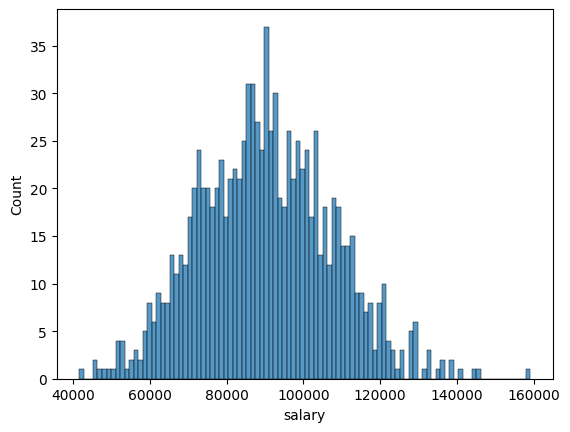

In [35]:
sns.histplot(data=df,x='salary',bins=100)

## Adding ina  grid and styles

<Axes: xlabel='salary', ylabel='Count'>

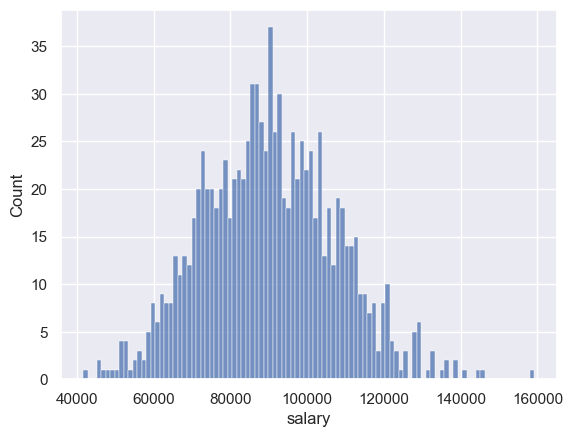

In [36]:
sns.set(style='darkgrid')
sns.histplot(data=df, x='salary', bins=100)

## The Kernel Density Estimation Plot

**Note: Review the video for full detailed explanation.**

The KDE plot maps an estimate of a probability *density* function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

Let's build out a simple example:

In [37]:
import numpy as np

In [39]:
np.random.seed(42)

# randint should be uniform, each age has the same chance of being chosen
# note: in reality ages are almost never uniformally distributed, but this is just an example
sample_ages = np.random.randint(0,100,200)
sample_ages

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74, 87, 99, 23,  2, 21, 52,  1,
       87, 29, 37,  1, 63, 59, 20, 32, 75, 57, 21, 88, 48, 90, 58, 41, 91,
       59, 79, 14, 61, 61, 46, 61, 50, 54, 63,  2, 50,  6, 20, 72, 38, 17,
        3, 88, 59, 13,  8, 89, 52,  1, 83, 91, 59, 70, 43,  7, 46, 34, 77,
       80, 35, 49,  3,  1,  5, 53,  3, 53, 92, 62, 17, 89, 43, 33, 73, 61,
       99, 13, 94, 47, 14, 71, 77, 86, 61, 39, 84, 79, 81, 52, 23, 25, 88,
       59, 40, 28, 14, 44, 64, 88, 70,  8, 87,  0,  7, 87, 62, 10, 80,  7,
       34, 34, 32,  4, 40, 27,  6, 72, 71, 11, 33, 32, 47, 22, 61, 87, 36,
       98, 43, 85, 90, 34, 64, 98, 46, 77,  2,  0,  4, 89, 13, 26,  8, 78,
       14, 89, 41, 76, 50, 62, 95, 51, 95,  3, 93, 22, 14, 42, 28, 35, 12,
       31, 70, 58, 85, 27, 65, 41, 44, 61, 56,  5, 27, 27, 43, 83, 29, 61,
       74, 91, 88, 61, 96,  0, 26, 61, 76,  2, 69, 71, 26], dtype=int32)

In [41]:
sample_ages=pd.DataFrame(sample_ages,columns=['age'])

<Axes: xlabel='age', ylabel='Density'>

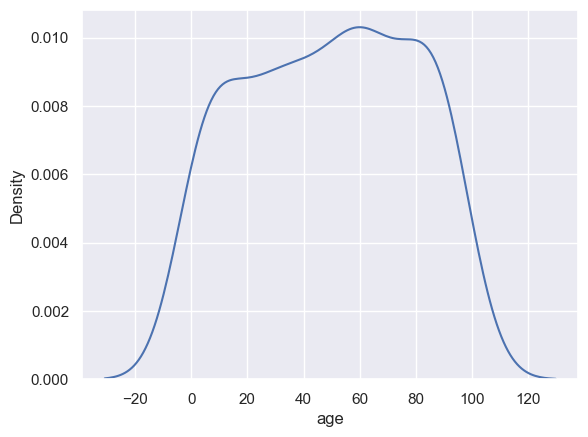

In [42]:
sns.kdeplot(data=sample_ages, x="age")

### Cut Off KDE

We could cut off the KDE if we know our data has hard limits (no one can be a negative age and no one in the population can be older than 100 for some reason)

<Axes: xlabel='age', ylabel='Density'>

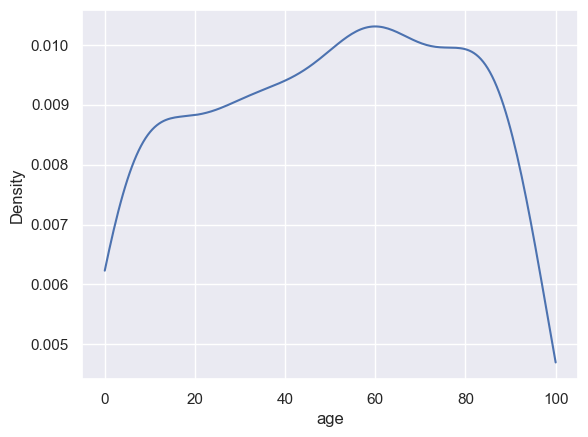

In [43]:
# plt.figure(figsize=(12,8))
sns.kdeplot(data=sample_ages,x='age',clip=[0,100])

### Bandwidth

As explained in the video, the KDE is constructed through the summation of the kernel (most commonly Gaussian), we can effect the bandwith of this kernel to make the KDE more "sensitive" to the data. Notice how with a smaller bandwith, the kernels don't stretch so wide, meaning we don't need the cut-off anymore. This is analagous to increasing the number of bins in a histogram (making the actual bins narrower).

<Axes: xlabel='age', ylabel='Density'>

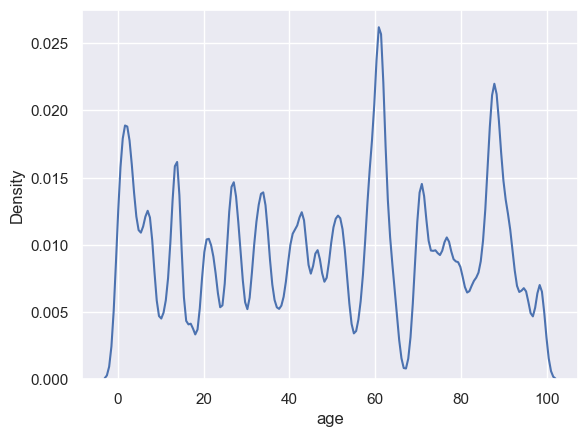

In [47]:
sns.kdeplot(data=sample_ages,x='age',bw_adjust=0.1)

<Axes: xlabel='age', ylabel='Density'>

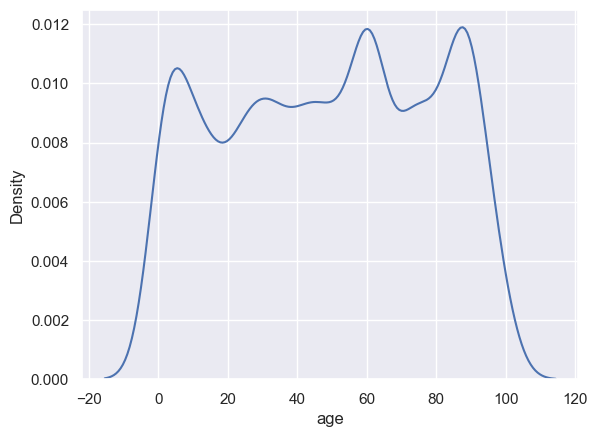

In [45]:
sns.kdeplot(data=sample_ages,x='age',bw_adjust=0.5)

<Axes: xlabel='age', ylabel='Density'>

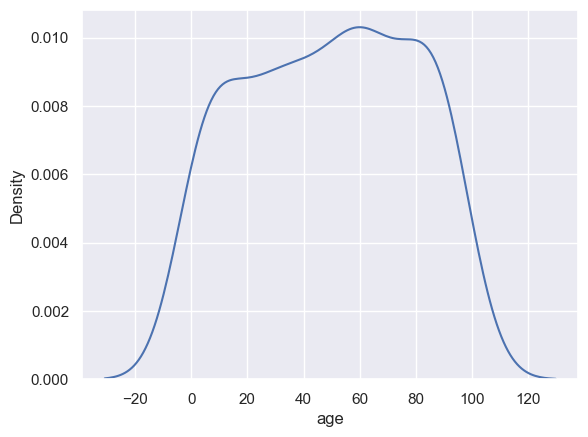

In [48]:
sns.kdeplot(data=sample_ages,x='age',bw_adjust=1)

C:\Users\balaj\AppData\Local\Temp\ipykernel_24716\1034545367.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=sample_ages,x='age',bw_adjust=0.5,shade=True,color='red')


<Axes: xlabel='age', ylabel='Density'>

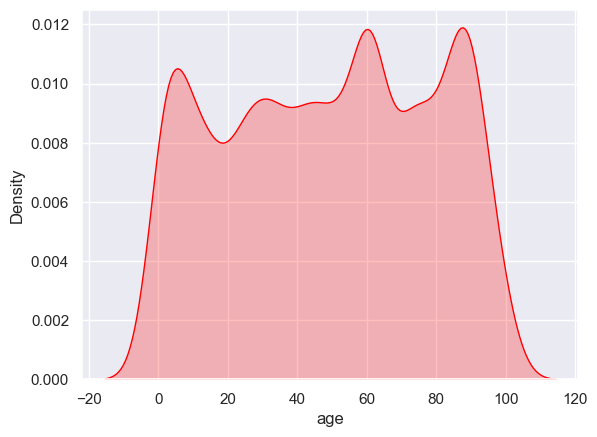

In [49]:
# styling
sns.kdeplot(data=sample_ages,x='age',bw_adjust=0.5,shade=True,color='red')

## 2 Dimensional KDE Plots

We will cover these in more detail later, but just keep in mind you could compare two continuous features and create a 2d KDE plot showing there distributions with the same kdeplot() call. Don't worry about this now, since we will cover it in more detail later when we talk about comparing 2 features against each other in a plot call.

In [51]:
random_data = pd.DataFrame(np.random.normal(0,1,size=(100,2)),columns=['x','y'])
random_data

,x,y
0,-0.828995,-0.560181
1,0.747294,0.610370
2,-0.020902,0.117327
3,1.277665,-0.591571
4,0.547097,-0.202193
...,...,...
95,-0.007973,1.479944
96,0.077368,-0.861284
97,1.523124,0.538910
98,-1.037246,-0.190339


<Axes: xlabel='x', ylabel='y'>

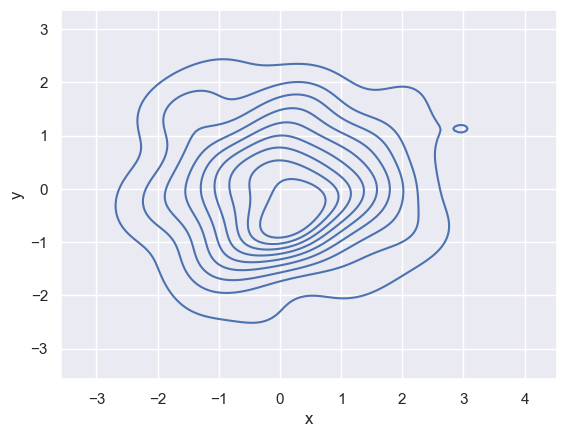

In [52]:
sns.kdeplot(data=random_data, x='x', y='y')

### Bonus Code for Visualizations from Video Lecture

Below is the code used to create the visualizations shown in the video lecture for an explanation of a KDE plot. We will not cover this code in further detail, since it was only used for the creation of the slides shown in the video.

In [ ]:
from scipy import stats

In [53]:
np.random.seed(101)
x = np.random.normal(0, 1, size=20)

<Axes: >

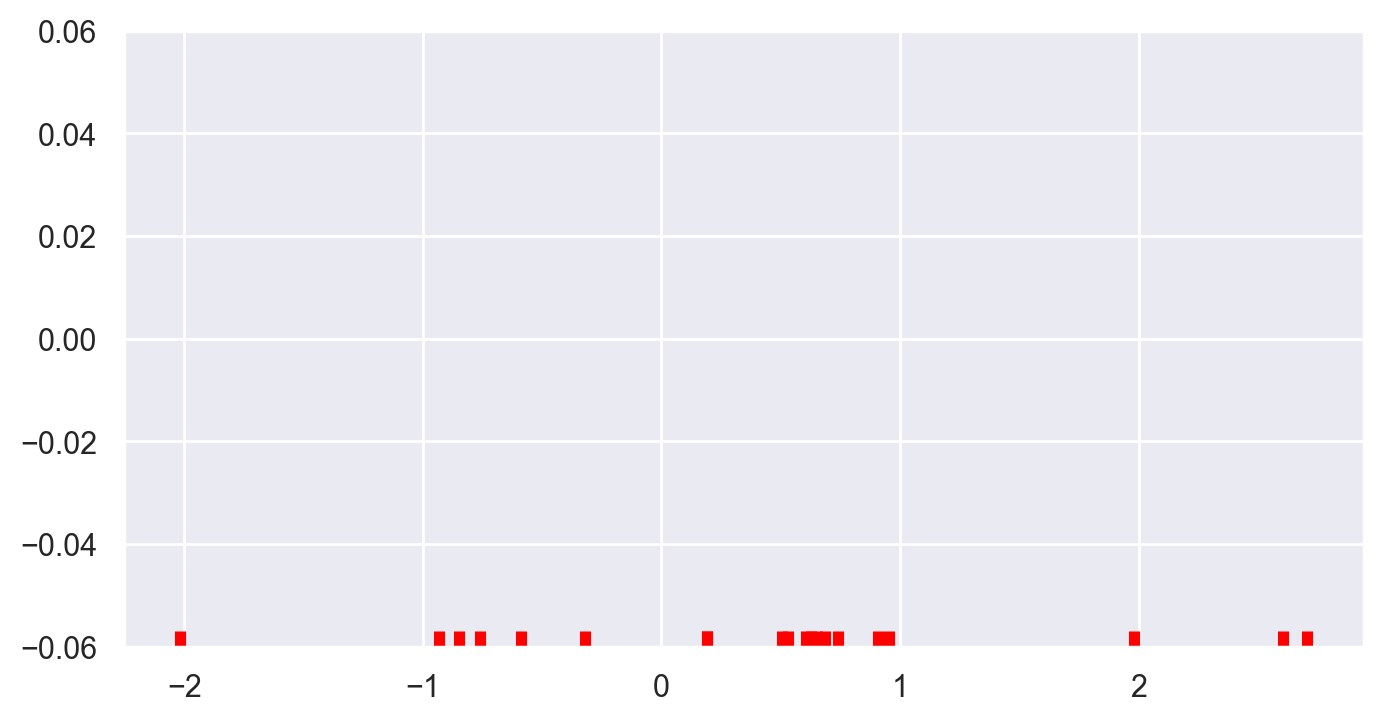

In [54]:
plt.figure(figsize=(8,4),dpi=200)
sns.rugplot(x, color="red", linewidth=4)

In [55]:
plt.figure(figsize=(8,4),dpi=200)
bandwidth = x.std() * x.size ** (-0.001)
support = np.linspace(-5, 5, 100)

kernels = []

plt.figure(figsize=(12,6))

for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="lightblue")

sns.rugplot(x, color="darkblue", linewidth=4);

NameError: name 'stats' is not defined

<Figure size 1600x800 with 0 Axes>

<Figure size 1200x600 with 0 Axes>